In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("gt_2015.csv")

In [3]:
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [4]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [5]:
y = dataset.iloc[:,-1].values

In [6]:
x

array([[1.9532e+00, 1.0201e+03, 8.4985e+01, ..., 1.1627e+02, 1.0799e+01,
        7.4491e+00],
       [1.2191e+00, 1.0201e+03, 8.7523e+01, ..., 1.0918e+02, 1.0347e+01,
        6.4684e+00],
       [9.4915e-01, 1.0222e+03, 7.8335e+01, ..., 1.2588e+02, 1.1256e+01,
        3.6335e+00],
       ...,
       [5.4820e+00, 1.0285e+03, 9.5219e+01, ..., 1.0781e+02, 1.0462e+01,
        1.1414e+01],
       [5.8837e+00, 1.0287e+03, 9.4200e+01, ..., 1.3141e+02, 1.1771e+01,
        3.3134e+00],
       [6.0392e+00, 1.0288e+03, 9.4547e+01, ..., 1.2541e+02, 1.1462e+01,
        1.1981e+01]])

In [7]:
y

array([113.25 , 112.02 ,  88.147, ...,  96.147,  64.738, 109.24 ])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
r = DecisionTreeRegressor(random_state= 0,max_depth = 5)
r.fit(x,y)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [10]:
y_pred = r.predict(x)

In [11]:
y_pred

array([99.86718182, 99.86718182, 82.82947982, ..., 88.23663636,
       68.6209097 , 68.6209097 ])

In [12]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, y_pred)
print(r_squared)

0.8169124949838047


In [13]:
X = dataset.iloc[:,[0,9,10]].values
x = dataset.iloc[:,:].values

<function matplotlib.pyplot.show(close=None, block=None)>

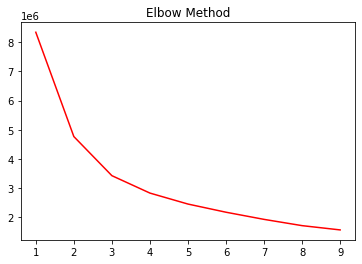

In [14]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++',random_state=0).fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,10),wcss,color = 'red')

plt.title("Elbow Method")
plt.show

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init="k-means++",random_state=0)
y1 = km.fit_predict(X)

In [16]:
y1

array([2, 2, 2, ..., 2, 1, 2], dtype=int32)

# Plot is 10d 

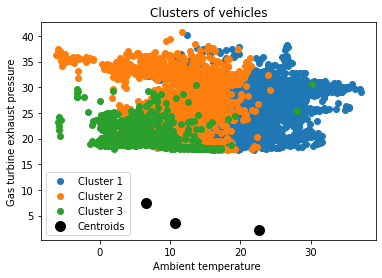

In [17]:
plt.scatter(x[y1 == 0, 0], x[y1 == 0, 4], label = 'Cluster 1')
plt.scatter(x[y1 == 1, 0], x[y1 == 1, 4],  label = 'Cluster 2')
plt.scatter(x[y1 == 2, 0], x[y1 == 2, 4], label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of vehicles')
plt.xlabel('Ambient temperature ')
plt.ylabel('Gas turbine exhaust pressure')
plt.legend()
plt.show()

In [18]:
km.cluster_centers_

array([[22.60977783,  2.21682057, 53.14461672],
       [10.68817212,  3.62800097, 64.79186174],
       [ 6.59565086,  7.45634286, 86.79906076]])

# 3 colums for plot visualizaation with hierarchical cluster

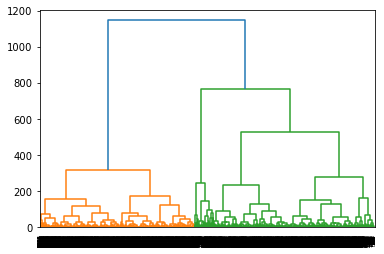

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [20]:
from sklearn.cluster import AgglomerativeClustering
k1 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
h = k1.fit_predict(x)

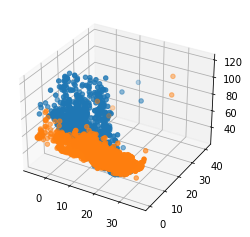

In [21]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[h == 0,0], X[h == 0, 1],X[h == 0,2])
ax.scatter3D(X[h == 1,0], X[h == 1, 1],X[h == 1,2])